In [1]:
# Importing Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from tensorflow.keras.models import load_model

IMG_SIZE = 150
BATCH_SIZE = 32

In [2]:
# Loading the dataset and preporocessing

train_dir = "/content/drive/MyDrive/Dataset/DATASET MRI SCANS /Training"
test_dir = "/content/drive/MyDrive/Dataset/DATASET MRI SCANS /Testing"

IMG_SIZE = 150

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)


Found 5902 images belonging to 4 classes.
Found 1351 images belonging to 4 classes.


In [3]:
# Building a CNN Model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Model Training Phase with 5 Epochs
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1377s 7s/step - accuracy: 0.2441 - loss: -250860464.0000 - val_accuracy: 0.2265 - val_loss: -12333508608.0000
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.2448 - loss: -79403982848.0000 - val_accuracy: 0.2265 - val_loss: -743289389056.0000
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.2386 - loss: -1718934700032.0000 - val_accuracy: 0.2265 - val_loss: -7088979312640.0000
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.2400 - loss: -12039992901632.0000 - val_accuracy: 0.2265 - val_loss: -32392372813824.0000
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.2398 - loss: -47083822252032.0000 - val_accuracy: 0.2265 - val_loss: -99890529042432.0000


In [5]:
# Model Evaluation

loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy*100:.2f}%")

43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 556ms/step - accuracy: 0.2207 - loss: -105487559294976.0000
Test Accuracy: 22.65%


43/43 ━━━━━━━━━━━━━━━━━━━━ 32s 717ms/step
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       310
  meningioma       0.23      1.00      0.37       306
     notumor       0.00      0.00      0.00       415
   pituitary       0.00      0.00      0.00       320

    accuracy                           0.23      1351
   macro avg       0.06      0.25      0.09      1351
weighted avg       0.05      0.23      0.08      1351



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


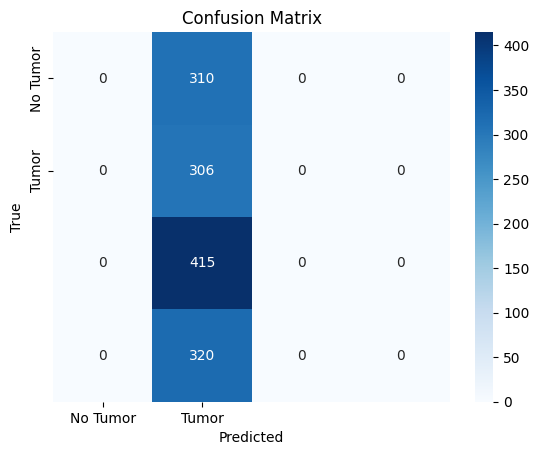

In [8]:
# Classification Report and Confusion Matrix
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int).flatten()

y_true = test_data.classes
class_names = sorted(test_data.class_indices, key=test_data.class_indices.get)

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Save the model
model.save("model/brain_tumor_cnn_model.h5")

In [15]:
# Prediction on a new image
import cv2
import numpy as np
from tensorflow.keras.models import load_model # Make sure this is imported if you are loading a model

# Assuming IMG_SIZE and model are defined elsewhere
# IMG_SIZE = 150
# model = load_model("your_model_path.h5") # Load your model if not already loaded

def predict_image(image_path):
    img = cv2.imread(image_path)
    # Add a check to see if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return "Error: Image not found or could not be read"

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    return "Tumor" if pred[0][0] >= 0.5 else "No Tumor"

# Example:
predict_image("/content/drive/MyDrive/Dataset/DATASET MRI SCANS /Testing/glioma/Te-glTr_0000.jpg")

predict_image("/content/drive/MyDrive/Dataset/DATASET MRI SCANS /Testing/glioma/Te-glTr_0002.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


'Tumor'